# Least-Squares Regression Notebook <br/> Using the Normal Equations 
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [2]:
def rsquared(xi,yi,ymodel):
    '''
    xi: vector of length n representing the known x values.
    yi: vector of length n representing the known y values that correspond to xi.
    ymodel: a python function (of x only) that can be evaluated at xi and represents a model fit of 
            the data (e.g. a regressed curve).
    '''
    ybar = np.average(yi)
    fi = ymodel(xi)
    result = 1 - np.sum( (yi - fi)**2 )/np.sum( (yi - ybar)**2 )
    return result

The purpose of this workbook is to develop a model that predicts the university GPA given a high-school GPA. We will use regression analysis to illustrate how we can do a best fit in the least-squares sense. We will use the normal equations to show this and also compare to direct regression as well as `numpy's` `polyfit` function.

First, load GPA data from gpa_data.txt. This data file contains the following columns:

high_GPA math_SAT verb_SAT comp_GPA univ_GPA

where

* high_GPA	High school grade point average
* math_SAT	Math SAT score
* verb_SAT	Verbal SAT score
* comp_GPA	Computer science grade point average
* univ_GPA	Overall university grade point average

This data was obtained from http://onlinestatbook.com/2/case_studies/sat.html. "The data examine the SAT and GPA information of 105 students who graduated from a state university with a B.S. in computer science. Using the grades and test scores from high school"


In [3]:
data = np.loadtxt('gpa_data.txt').T

In [4]:
# high school gpa
hgpa = data[0]
# university gpa
ugpa = data[4]

As usual, the first thing to do is plot the data

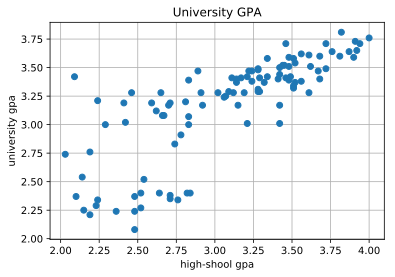

In [5]:
plt.plot(hgpa,ugpa,'o')
plt.xlabel('high-shool gpa')
plt.ylabel('university gpa')
plt.title('University GPA')
plt.grid()

We will now develop a regression model for this using the normal equaitons.

## Straight Line Fit
 For a straight line model, we have
\begin{equation}
y = a_0 + a_1 x
\end{equation}
For this model, the normal equations are given by the system
\begin{equation}
\left[ {\begin{array}{*{20}{c}}
1& x_1\\
1& x_2 \\
 \vdots & \vdots \\
1& x_n
\end{array}} \right]\left( \begin{array}{l}
a_0\\
a_1
\end{array} \right) = \left( {\begin{array}{*{20}{c}}
y_1\\
y_2\\
 \vdots \\
y_n
\end{array}} \right)
\end{equation}
To solve this system in the least-squares sense, we have to solve the following system
\begin{equation}
[\mathbf{A}]^\text{T} [\mathbf{A}]  \mathbf{a} = [\mathbf{A}]^\text{T} \mathbf{b}
\end{equation}

For simplicity, let's rename of input data

In [6]:
xi = hgpa
yi = ugpa

We now develop the matrix A as a numpy array of column vectors

In [7]:
# get the size of the input data
N = len(xi)
# note that we have to take the transpose to make this work
A = np.array([np.ones(N),xi]).T

Now construct the normal equations

In [8]:
ATA =  A.T @ A
b   = A.T@yi

solve them using the `linalg` package

In [9]:
sol = np.linalg.solve(ATA,A.T@yi)
print(sol)

[1.09682328 0.6748299 ]


Recall that the solution contains the coefficients of the linear fit. To plot the fit on top of the input data, we simply use the coefficients to create a straight line and plot it

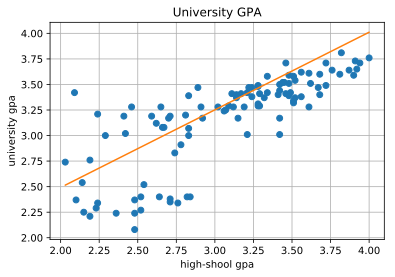

In [23]:
a0 = sol[0]
a1 = sol[1]
fit = lambda x: a0 + a1*x
plt.plot(xi,yi,'o')
plt.plot(xi,fit(xi))
plt.xlabel('high-shool gpa')
plt.ylabel('university gpa')
plt.title('University GPA')
plt.grid()

Let's check the R2 value

In [24]:
r2 = rsquared(xi,yi,fit)
print(r2)

0.5036754689173208


## Quadratic Fit
 For a quadratic model, we have
\begin{equation}
y = a_0 + a_1 x + a_2 x^2
\end{equation}
For this model, the normal equations are given by the system
\begin{equation}
\left[ {\begin{array}{*{20}{c}}
1&x_1 & x_1^2\\
1&x_2 & x_2^2\\
 \vdots & \vdots & \vdots\\
1 & x_n & x_n^2
\end{array}} \right]\left( \begin{array}{l}
{a_0}\\
{a_1} \\
a_2
\end{array} \right) = \left( {\begin{array}{*{20}{c}}
y_1\\
y_2\\
 \vdots \\
y_n
\end{array}} \right)
\end{equation}
To solve this system in the least-squares sense, we have to solve the following system
\begin{equation}
[\mathbf{A}]^\text{T} [\mathbf{A}]  \mathbf{a} = [\mathbf{A}]^\text{T} \mathbf{b}
\end{equation}

In [25]:
# note that we have to take the transpose to make this work
A = np.array([np.ones(N),xi, xi**2]).T

Now construct the normal equations

In [26]:
ATA =  A.T @ A
b   = A.T@yi

solve them using the `linalg` package

In [27]:
sol = np.linalg.solve(ATA,A.T@yi)
print(sol)

[ 0.97314251  0.75950032 -0.01406161]


Recall that the solution contains the coefficients of the linear fit. To plot the fit on top of the input data, we simply use the coefficients to create a straight line and plot it

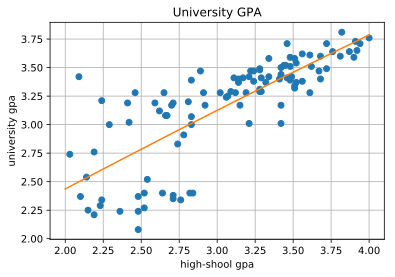

In [28]:
a0 = sol[0]
a1 = sol[1]
a2 = sol[2]
fit = lambda x: a0 + a1*x + a2*x**2
plt.plot(xi,yi,'o')

# here we must generate a linear space so that the polynomial 
# doesn't go through duplicate x values from the input data
xx = np.linspace(2,4)
plt.plot(xx,fit(xx))

plt.xlabel('high-shool gpa')
plt.ylabel('university gpa')
plt.title('University GPA')
plt.grid()

Finally, the R2 value is

In [37]:
r2 = rsquared(xi,yi,fit)
print(r2)

0.6077867092534325


## Using Polyfit

In [36]:
coefs = np.polyfit(xi,yi,1)
print(coefs)

[0.6748299  1.09682328]


0.6378477159771265


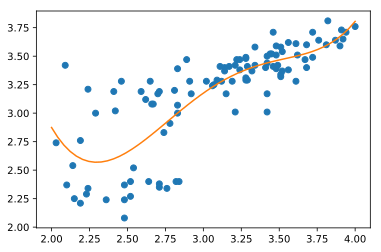

In [35]:
p = np.poly1d(coefs)
plt.plot(xi,yi,'o')
x = np.linspace(2,4)
plt.plot(x,p(x))
print(rsquared(xi,yi,p))

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()